# AirBNB: Neighborhood Popularity prediction in Amsterdam 

## Problem statement

>A tours and travel company that designs packages for Millenial travellers is exploring solutions to recommend better deals for its budget travellers, with increasing demand and a need to offer competetive pricing the company wants to look for solutions and minimize Hotel rental costs for its customers. 

>They have seen a large segment of their customers are looking to use AirBNB as an alternative to hotels, thus the company wants to recommend popular areas and top AirBNB homes to its customers who buy flight and sightseeing packages. 

>Luxury travallers are also looking for top AirBNB homes and want a leisurely experience by renting the most exclusive homes for their families while they travel to European destinations like "Amsterdam"

## Available data: 

We have historical data about AirBNB bookings in "Amsterdam" which includes the location of the homes, satisfaction ratings, pricing, size of the home and its neighbohood. 

## Important Statistics 
<ol>
<li>92% of the budget travellers rate AirBNB as their top choice for stay in Amsterdam
<li>64% of the luxury travellers suggest that they like to rent a exclusive property to entertain their families during a holiday
<li> There has been a 20% increase in the satisfaction rating of AirBNB customers and more people are seeing this as an alternative to hotels. 
</ol>

## Business value 

>With the new model the company will be able to offer better overall prices for Budget travellers especially going to "Amsterdam" as it is one of the most popular destination for its customers. 

>For luxury travellers company needs to find the top quality AirBNB homes with high satisfaction and most modern amenities. 

>This will positively impact the company's overall rating and more customers will be likely to recommend the company to book tours amongst their own circles.

## Risk 

The company may lose customers if they don't have options for budget travallers, which a very growing segment and has a huge upside in the near future. The segment is expected to grow 2 times by 2020. 

Company would lose high value clients if it cannot provide top AirBNB homes to their clients, Luxury travellers tend to spend more per person for company's other rental programs such as Sightseeing packages, car rentals, private jets,flight bookings etc. 

## Exploring solutions 

<b>In the notebook, we will be looking for solutions to classify properties. We can determine the exact nature of solutions only by exploring the dataset. 


In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the dataset
dataset = pd.read_csv('airbnbamsterdam1.csv')

X = dataset.iloc[:,6:10].values
y = dataset.iloc[:, 4].values
y_unique=np.unique(y)

dataset.head(5)



# Exploring the dataset
Looking at raw data it is difficult to examine all features we need to get some statistics, build visualizations to get a more detailed view of the data

<ol>
<li> Describe price 
<li> Average ratings on room type
<li> Explore other features that may be important for building models. 
<li> Classify and predict popular neighborhoods
<li> Classify properties as luxury or budget

</ol>


In [16]:
dataset['price'].describe() #Descriptive statistics on numerical variable price

count    5645.000000
mean      191.353942
std       134.291993
min        23.000000
25%       122.000000
50%       153.000000
75%       228.000000
max      4588.000000
Name: price, dtype: float64

## Average Price
The average Price is around 200 we now have to check for skewness and determine if most values are around the mean or skewed.

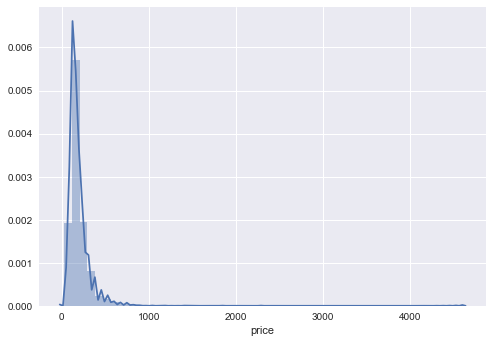

In [17]:
from scipy.stats import norm
ax = sns.distplot(dataset["price"])
sns.plt.show()



In [18]:
dataset["price"].skew()

9.055124066739797

## Positive Skewness

This indicates that majority of the values are located on the left of the mean and median is very high from the mean in our dataset, we find support for the arguement that AirBNB homes are decently priced for budget travallers. Our sample is biased towards budget homes. We can detect the outliers to find luxury properties.

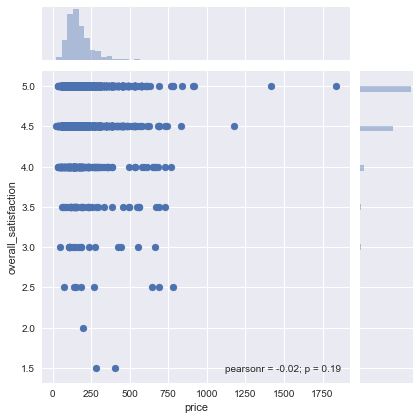

In [19]:
 g = sns.jointplot("price", "overall_satisfaction", data=dataset)
sns.plt.show()

## Scatterplot of Overall Satisfaction and Price

We can use this relation to classify properties if they are value for money, further we can see that some properties that are expensive than 500 and have ratings above 4 may be good to recommend to luxury travellers, offcourse this needs further drilling down, and we need more exploration to arrive at results.  

In [36]:
dataset['room_type'].describe()

count                5645
unique                  3
top       Entire home/apt
freq                 4552
Name: room_type, dtype: object

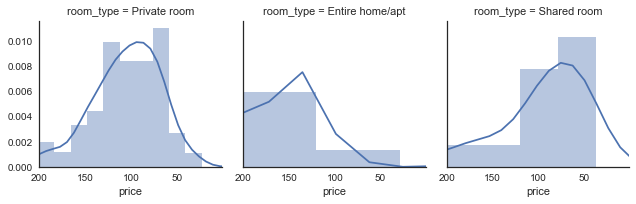

In [37]:
g = sns.FacetGrid(dataset, col="room_type",xlim=200) 
g.map(sns.distplot, "price")
sns.plt.show()

## Budget Travel Constraints: Drilling down on Price & Room Type

The above chart tries to find support for which kind of rooms are available for Budget travellers. 
We find that in the price range <b>50-150 </b> there are plenty of Private rooms available. 

There are <b>limited</b> Entire homes available for budget travellers. 

Plenty of<b> Shared rooms are available from price range 50-100</b>



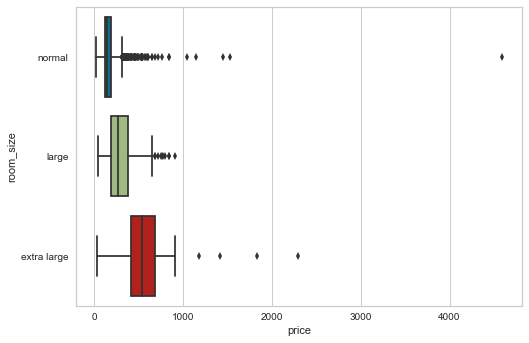

In [63]:
dataset['room_size']='normal'

def roomsize(c):
 if c['accommodates'] < 5:
  return 'normal' 
 elif c['accommodates']< 9:
  return 'large' 
 else :
  return 'extra large'

dataset['room_size']= dataset.apply(roomsize,axis=1)
#df['alert'] = df.apply(alert, axis=1)


ax1 = sns.boxplot(dataset["price"], dataset['room_size'],orient="h")

sns.plt.show()

# Boxplot to explore price range with size of the room

The numeric feature "Accommodates"  is catergorized into 3 groups to form a categorical variable room_size, which classifies the rooms into:  
<b>normal(upto 4 persons), large (5-8 persons) and extra large (above 8 persons) </b>

Further we explore the relationship between room_size and price by building a boxplot. We can easily spot outliers here. 

Some rooms that are of normal size do have extravagant pricing above 500 and can be luxury properties or may have benefits of being close of popular landmarks, it may be listings that are in popular neighborhoods, we need further evidence. 

In [22]:
dataset['room_size'].value_counts()

normal         4817
large           727
extra large     101
Name: room_size, dtype: int64

In [53]:
dataset['neighborhood'].value_counts()

Centrum West                              1044
Centrum Oost                               787
De Baarsjes / Oud West                     753
De Pijp / Rivierenbuurt                    745
Noord-West / Noord-Midden                  462
Westerpark                                 356
Oostelijk Havengebied / Indische Buurt     311
Oud Oost                                   296
Bos en Lommer                              228
Watergraafsmeer                            135
Slotervaart                                119
Oud Noord                                  119
Ijburg / Eiland Zeeburg                     64
Buitenveldert / Zuidas                      59
Noord West                                  46
Geuzenveld / Slotermeer                     35
De Aker / Nieuw Sloten                      31
Noord Oost                                  28
Osdorp                                      26
Westpoort                                    1
Name: neighborhood, dtype: int64

## Centrum West is the most popular neighborhood

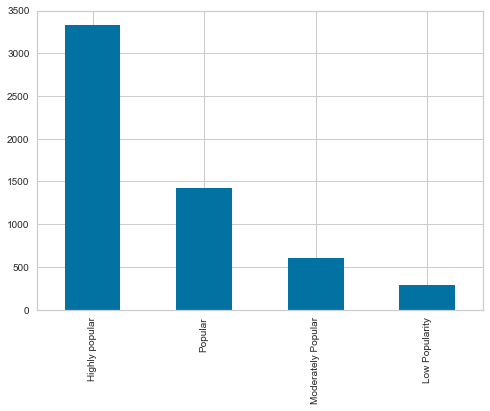

In [55]:
dataset=datasetnew


cleanup_nums = {"neighborhood":     {"Centrum West":"Highly popular" ,"Centrum Oost":"Highly popular", 
                                     "De Baarsjes / Oud West":"Highly popular","De Pijp / Rivierenbuurt":"Highly popular",
                                    
                                     "Noord-West / Noord-Midden":"Popular", "Westerpark":"Popular", "Oostelijk Havengebied / Indische Buurt":"Popular", 
                                    "Oud Oost":"Popular",
                                     
                                     "Bos en Lommer":"Moderately Popular", "Watergraafsmeer":"Moderately Popular",
                                     "Slotervaart":"Moderately Popular","Oud Noord":"Moderately Popular",
                                     
                                     "Ijburg / Eiland Zeeburg":"Low Popularity", "Buitenveldert / Zuidas":"Low Popularity", 
                                    "Noord West":"Low Popularity", "Osdorp":"Low Popularity", 
                                    "Geuzenveld / Slotermeer":"Low Popularity", "De Aker / Nieuw Sloten":"Low Popularity", 
                                    "Noord Oost":"Low Popularity", "Westpoort":"Low Popularity"}}
                
datasetnew.replace(cleanup_nums, inplace=True)



datasetnew['neighborhood'].value_counts().plot(kind='bar')
plt.show()

    

## Categorizing neighborhoods into 4 categories

Using Count as a parameter, we divide using the following conditions: 
<li>
More than 700 : Highly Popular</li>
<li>More than 290 : Popular</li>
<li>More than 100: Moderately Popular</li>
<li>Less than 100: Low Popularity</li>

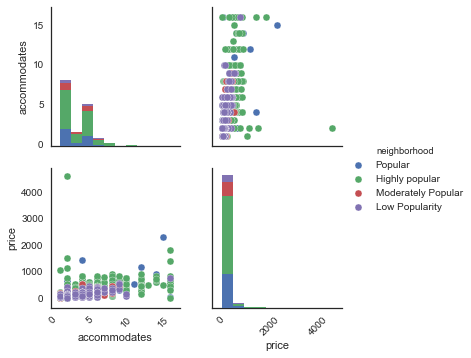

In [67]:
g = sns.pairplot(datasetn[["accommodates", "price" ,"neighborhood"]],hue= "neighborhood")

for ax in g.axes.flat: 
    plt.setp(ax.get_xticklabels(), rotation=45)
    
sns.plt.show()

## Overview of Price in every neighborhood and options based on size of the property

The above Pairplot tries to explore the relationship of price, neighborhood popularity and maximum number of people that the property can accommodate. 

Some obervations that are evident from the above graphs: 

1. Price Range is affected by neighborhood popularity, size of the property

2. Moderately popular neighborhoods may be recommended to budget travellers as they have better pricing

3. Highly popular neighborhoods have great demand, they don't have extra large properties. 

4. Luxury travellers might have more options in Popular areas with a few properties having all benefits including:
<b> good location, large size and better satisfaction ratings </b>

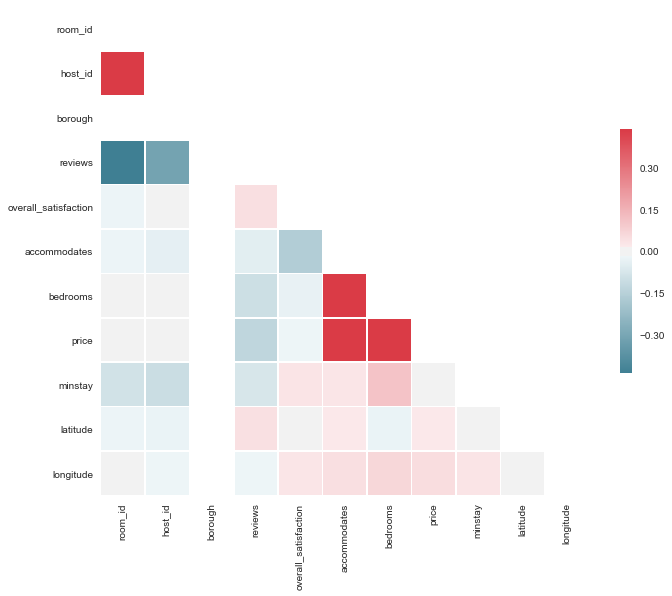

In [33]:
from string import ascii_letters
sns.set(style="white")

# Generate a large random dataset

d = pd.DataFrame(data=dataset)
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

sns.plt.show()

# Correlation Between variables 

We have to avoid the problem of multicolinearity in our models, hence it is important that we find the matrix of correlations and explore the relationships among variables. 

Results - We observe that number of bedrooms, price and price, accommodates have high correlation and price depends on size of the property. 

# Model-1 : Predict Popular Neighborhoods

In [58]:
# Taking care of missing data
from sklearn.preprocessing import Imputer
imputer = Imputer(missing_values = 'NaN', strategy = 'mean', axis = 0)
imputer = imputer.fit(X[:, 0:5])
X[:, 0:5] = imputer.transform(X[:, 0:5])


#Encoding the categorical variable neighborhood
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()
y= labelencoder_y.fit_transform(y)



## Data Preprocessing

There may be null values in the data set, we are using the imputer class to subsitute the null values with the mean. 

The categorical variable whose popularity we are trying to predict is to be encoded before we can pass it to our classification models.

It is important to note that in this case we have obtained data from a good source and data wrangling is fairly simple. In some other use cases where we have multiple data sources <b> internal and external data sources</b> the part of making the data ready to be given to the models may take upto 80% of the total time of the project. 

Once our model is built we will compare it other classifiers to optimize the performance of the model. 

This kind of iterative process helps in improving the accuracy of the project. 

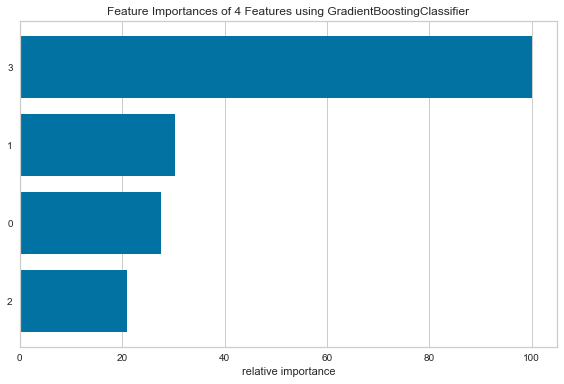

In [60]:
from sklearn.ensemble import GradientBoostingClassifier
from yellowbrick.features import FeatureImportances

# Create a new matplotlib figure
fig = plt.figure()
ax = fig.add_subplot()

viz = FeatureImportances(GradientBoostingClassifier(), ax=ax)
viz.fit(X, y)
viz.poof()

## Feature Engineering 

1. Most important feature in our matrix of features is feature 3 which is <b>"Price"</b> 
2. Next important feature is "overall_satisfaction" 

## Technique used 

We use a gradient boosting classifier from the yellowbrick library to compute most important features, further we use yellowbrick to visualize the results 

In [61]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)


# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Fitting Kernel SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)


# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)




## SVM Classifier output 




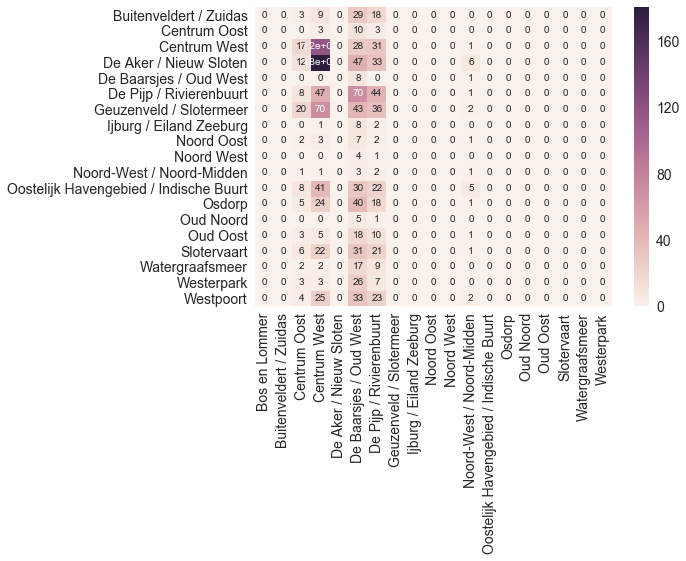

In [103]:

df_cm = pd.DataFrame(cm, range(19),
                  range(19))
#plt.figure(figsize = (10,7))
sns.set(font_scale=1.4)#for label size
sns.heatmap(df_cm, annot=True,annot_kws={"size": 10},xticklabels=y_unique,yticklabels=y_unique)# font size
sns.plt.show()


## Heatmap shows Predicted Popular Neighborhoods 

### Classification parameters 

Claasifier: Support Vector Classifier ( Kernel SVM) 

Input Features: Number of Reviews, Overall Satisfaction, Price, number of bedrooms, maximum people accommodated.  

Output: Popular Neighborhoods, They are visualized in the heat map. 

## Result

The following neighborhoods are popular for budget travellers according to our model: 

1. De Aker/ Nieuw Sloten
2. Centrum West
2. Guezenveld/ slotermeer
